In [2]:
from src.data import df

#Importing the dataset

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#Importing relevant libraries

In [3]:
print(df.shape)
#checking the dimensions of the data

(2000, 34)


In [4]:
print(df.info())
#checking the datatypes for each column
#also checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   StudentID                       2000 non-null   int64  
 1   TextLevel-01-SOY                2000 non-null   int64  
 2   TextLevel-01-MOY                2000 non-null   int64  
 3   TextLevel-01-EOY                2000 non-null   int64  
 4   TextLevel-02-SOY                2000 non-null   int64  
 5   TextLevel-02-MOY                2000 non-null   int64  
 6   TextLevel-02-EOY                2000 non-null   int64  
 7   WritingVocab-01-SOY             2000 non-null   int64  
 8   HRSIW-01-SOY                    2000 non-null   int64  
 9   Counting-01                     2000 non-null   int64  
 10  Counting-02                     2000 non-null   int64  
 11  Place Value-01                  2000 non-null   int64  
 12  Place Value-02                  20

It seems there are no missing values

In [5]:
print(df.describe())
#checking the ranges of the data

          StudentID  TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  \
count  2.000000e+03        2000.00000       2000.000000         2000.0000   
mean   5.459580e+08          10.69900         15.001500           21.1300   
std    2.580928e+08           6.10082          5.489496            4.5786   
min    1.006692e+08          -4.00000          0.000000            4.0000   
25%    3.163839e+08           6.00000         11.000000           18.0000   
50%    5.469370e+08          10.00000         14.000000           21.0000   
75%    7.670611e+08          14.00000         18.000000           24.0000   
max    9.998723e+08          34.00000         33.000000           34.0000   

       TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
count       2000.000000        2000.00000       2000.000000   
mean          21.786500          24.07300         26.998500   
std            5.220205           4.69134          3.765314   
min            2.000000           5.00000          5.0

The textlevel columns have values outside of the range given in the data description.

Further, the HRSIW column has some negative values.

In [3]:
df = df.loc[(df.iloc[:, 1:9]>=0).all(axis=1)&(df.iloc[:, 1:8]<=31).all(axis=1)]
#removing the undesirable data

In [13]:
print(df.describe())
#checking the data once again

          StudentID  TextLevel-01-SOY  TextLevel-01-MOY  TextLevel-01-EOY  \
count  1.483000e+03       1483.000000       1483.000000       1483.000000   
mean   5.454248e+08          9.099798         13.613621         20.041133   
std    2.587751e+08          4.931599          4.429200          4.039990   
min    1.006692e+08          0.000000          0.000000          4.000000   
25%    3.127914e+08          6.000000         11.000000         18.000000   
50%    5.512987e+08          9.000000         13.000000         20.000000   
75%    7.670971e+08         12.000000         16.000000         22.000000   
max    9.998723e+08         31.000000         31.000000         31.000000   

       TextLevel-02-SOY  TextLevel-02-MOY  TextLevel-02-EOY  \
count       1483.000000       1483.000000       1483.000000   
mean          20.541470         23.076871         26.355361   
std            4.706085          4.498256          3.756212   
min            2.000000          5.000000          5.0

There are some entries where the number of parents with education above year 9 is 3.

In [14]:
print(df["NumAbvYear9"].value_counts())
#checking the distribution of this column

NumAbvYear9
2    1015
1     251
0     216
3       1
Name: count, dtype: int64


There is only one such value, so it can be removed as an outlier

In [4]:
df = df.loc[df["NumAbvYear9"]!=3]
#removing the outlier

In [5]:
sns.set_theme(style="darkgrid", palette="CMRmap")
#setting a theme and palette for upcoming visualisations

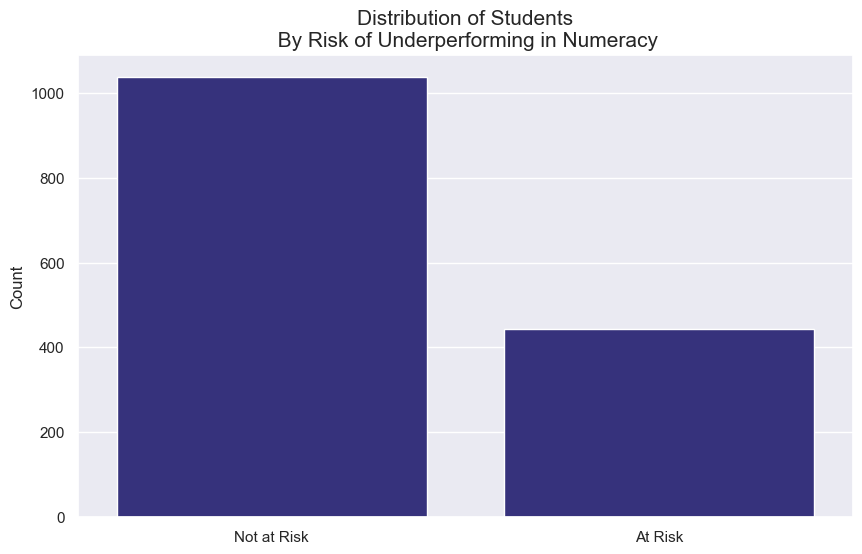

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=["Not at Risk", "At Risk"],
    y=df["At_Risk_Numeracy"].value_counts()
)
plt.title(
    "Distribution of Students\n By Risk of Underperforming in Numeracy",
    fontsize=15     
)
plt.ylabel("Count")
plt.show()

#plotting the distribution of the target variable

The distribution of the target variable is extremely imbalanced. 

Considering this, resampling techniques such as SMOTE should be used when developing our machine learning model.

In [35]:
print(df["Gender"].value_counts())

Gender
Male      783
Female    699
Name: count, dtype: int64


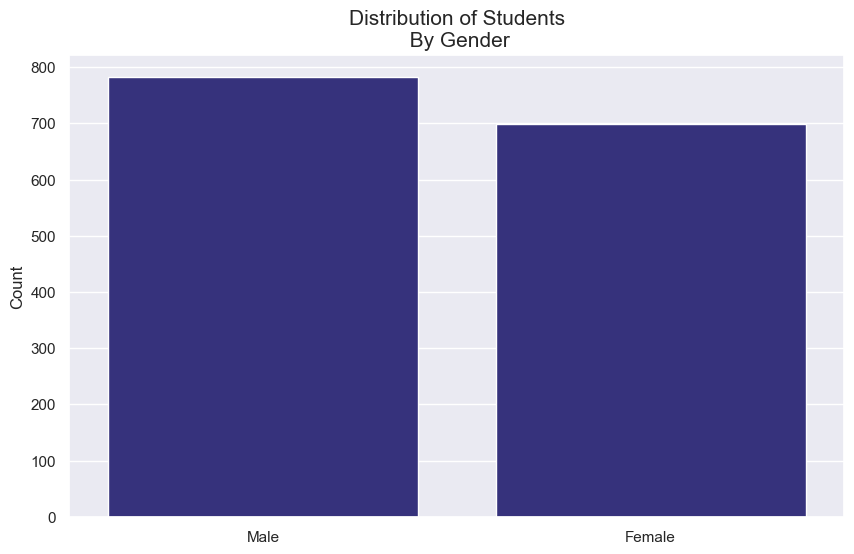

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=["Male", "Female"],
    y=df["Gender"].value_counts()
)
plt.title(
    "Distribution of Students\n By Gender",
    fontsize=15     
)
plt.ylabel("Count")
plt.show()

#plotting the distribution of the students gender


The Gender of the students are evenly distributed

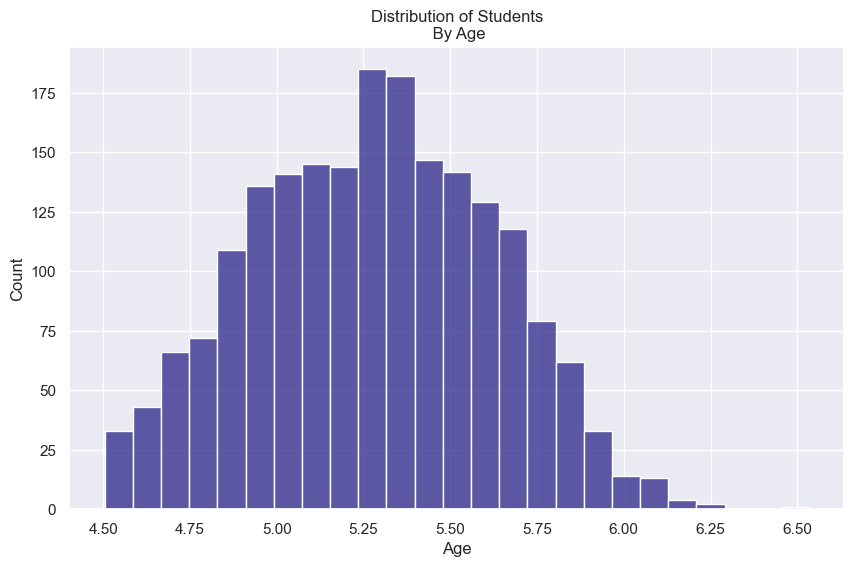

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df["Kinder_Age"])
plt.title("Distribution of Students\n By Age")
plt.xlabel("Age")
plt.show()

#Checking the distribution of the Students' ages

The ages of the students seems to be almost normally distributed

In [45]:
print(st.normaltest(df["Kinder_Age"]))

NormaltestResult(statistic=np.float64(45.08181219718771), pvalue=np.float64(1.6240854077677165e-10))


The data is clearly not normally distributed

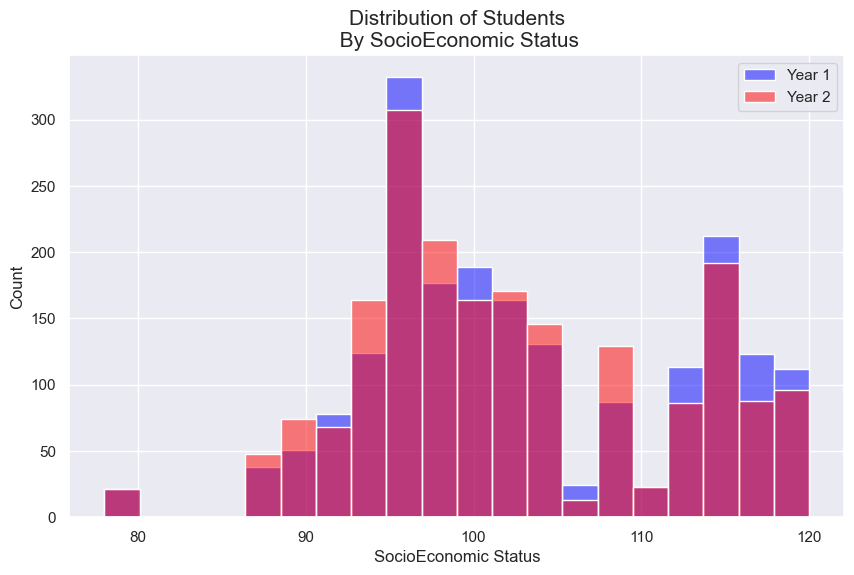

In [163]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df["01.SES"], hue=10, palette="brg", bins=20)
sns.histplot(x=df["02.SES"], hue=10, palette="prism", bins=20)
plt.title(
    "Distribution of Students\n By SocioEconomic Status",
    fontsize=15
)
plt.legend(["Year 1", "Year 2"])
plt.xlabel("SocioEconomic Status")
plt.show()
#Checking the distribution of the students by SES

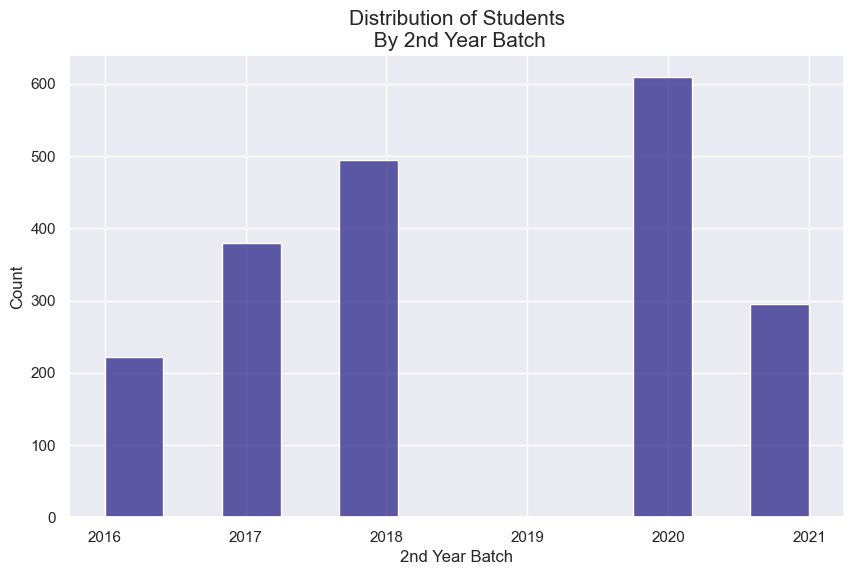

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Year_02"])
plt.title(
    "Distribution of Students\n By 2nd Year Batch",
    fontsize=15
)
plt.xlabel("2nd Year Batch")
plt.show()

Students who entered Year 2 in 2019 are notably missing from the data

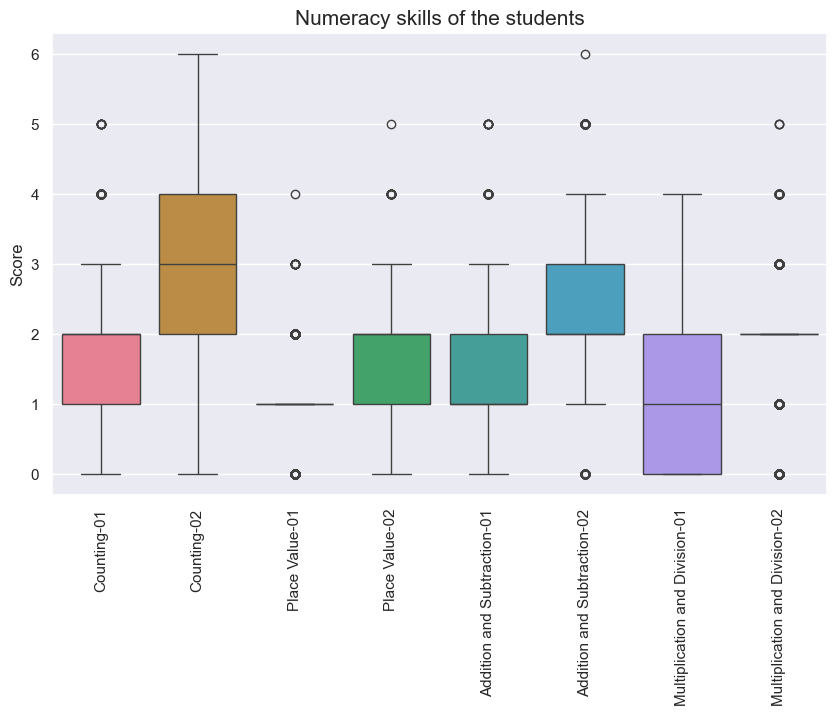

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(df.iloc[:, 9:17])
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title(
    "Numeracy Skills of the Students",
    fontsize=15
)
plt.show()
#plotting the students' performance in Numeracy

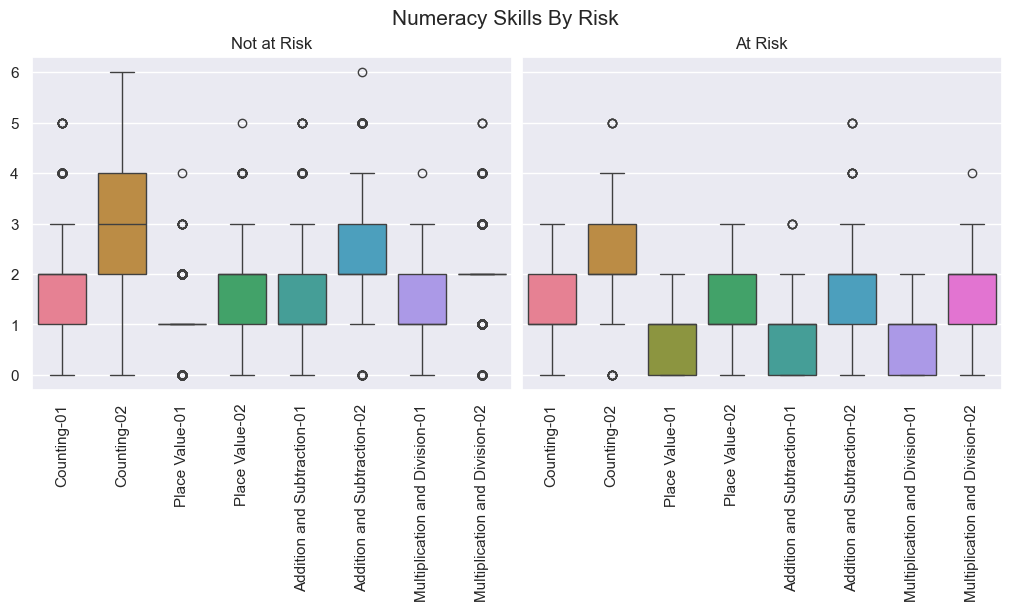

In [64]:
fig, ax = plt.subplots(1, 2, layout="constrained", figsize=(10, 6), sharey=True)
sns.boxplot(df.loc[df["At_Risk_Numeracy"]==False].iloc[:, 9:17], ax=ax[0])
sns.boxplot(df.loc[df["At_Risk_Numeracy"]==True].iloc[:, 9:17], ax=ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Not at Risk")
ax[1].set_title("At Risk")
fig.suptitle(
    "Numeracy Skills By Risk",
    fontsize=15
)
plt.show()
#Analysing numeracy scores by risk

As expected, students who are at risk generally have lower performance in numeracy during their first 2 years.

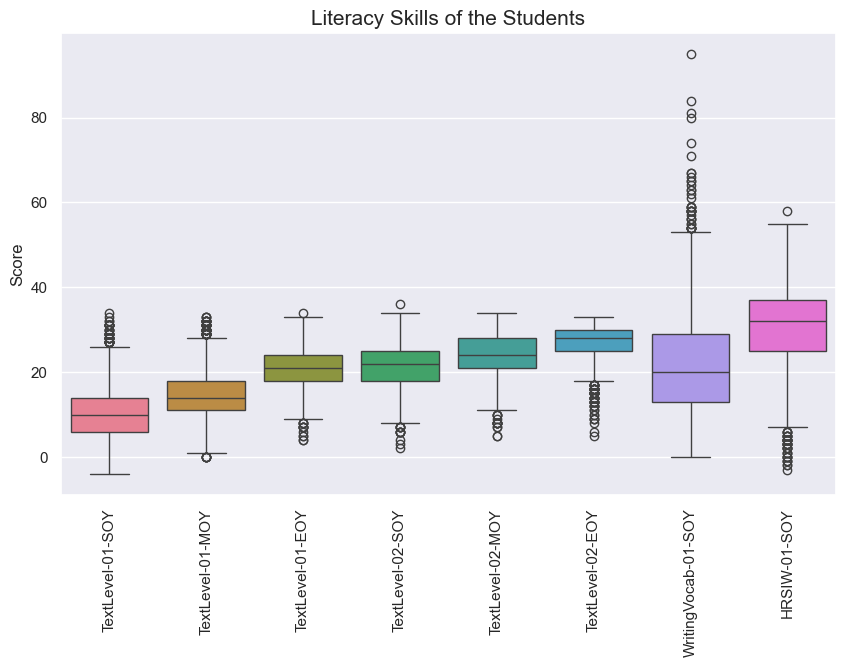

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(df.iloc[:, 1:9])
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title(
    "Literacy Skills of the Students",
    fontsize=15
)
plt.show()
#plotting the students' performance in Literacy

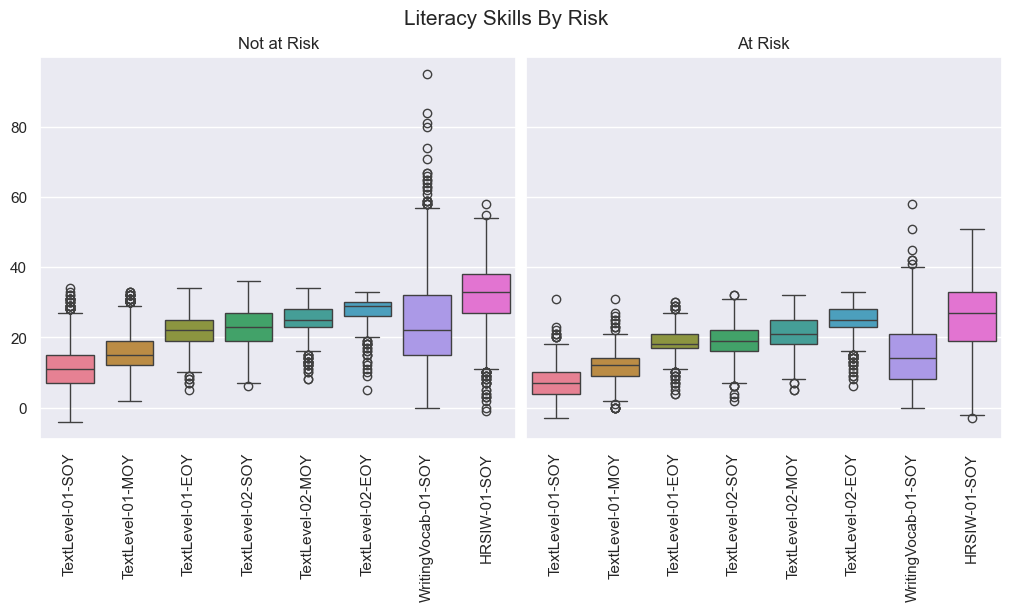

In [67]:
fig, ax = plt.subplots(1, 2, layout="constrained", figsize=(10, 6), sharey=True)
sns.boxplot(df.loc[df["At_Risk_Numeracy"]==False].iloc[:, 1:9], ax=ax[0])
sns.boxplot(df.loc[df["At_Risk_Numeracy"]==True].iloc[:,1:9], ax=ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Not at Risk")
ax[1].set_title("At Risk")
fig.suptitle(
    "Literacy Skills By Risk",
    fontsize=15
)
plt.show()
#Analysing literacy scores by risk

Students at risk seem to start out with weaker performances in TextLevel, yet reach the same level as those who arent at risk by the end of year 2

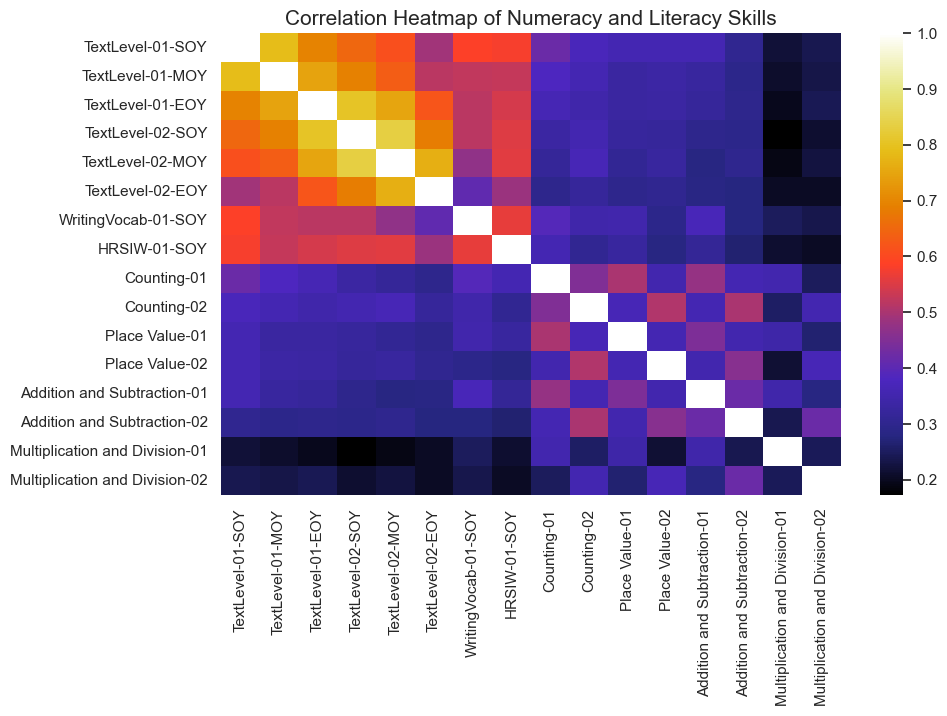

In [171]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 1:17].corr(), cmap="CMRmap")
plt.title(
    "Correlation Heatmap of Numeracy and Literacy Skills",
    fontsize=15
)
plt.show()

All columns relating to the students literacy skills seem highly correlated with each other.
The students performances in numeracy within the same year also seam moderately correlated.

This could indicate multi-collinearity which may bias our ML model. Considering this, proper feature engineering should be employed.

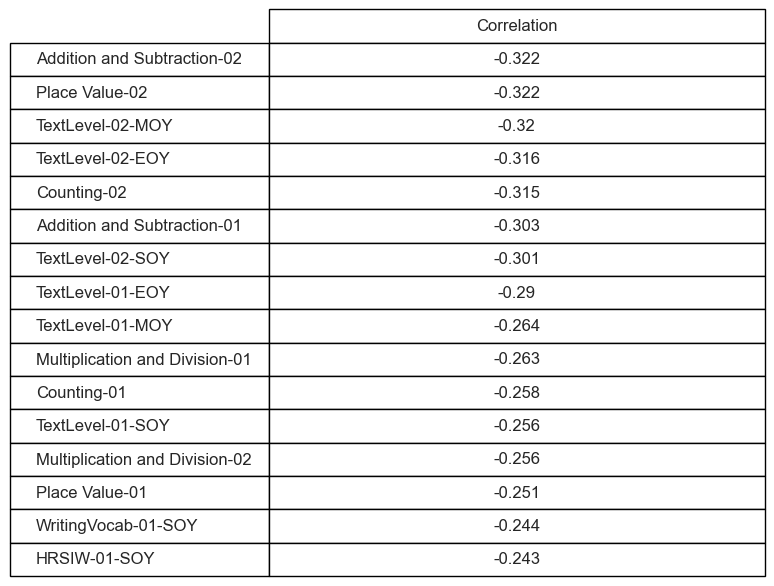

In [16]:
corrs = pd.DataFrame(df.iloc[:, 1:17].corrwith(df.iloc[:, -1]), columns=["Correlation"])
corrs["Correlation"] = [round(x, 3) for x in corrs["Correlation"]]
fig, ax, = plt.subplots()
ax.set_axis_off()
ax.table(corrs.sort_values(by="Correlation"), loc="center", cellLoc="center").scale(1, 2)
plt.show()
#Checking the correlation of the academic columns with the target variable

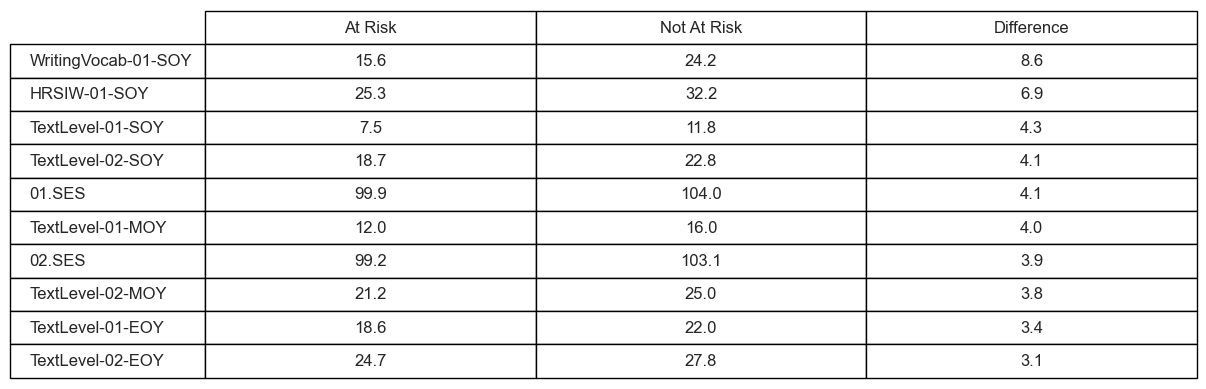

In [72]:
#Next, looking at the differences between the means of each column by risk

df_risk = df.loc[df["At_Risk_Numeracy"]==True]
df_not_risk = df.loc[df["At_Risk_Numeracy"]==False]
#creating 2 dataframes according to risk

risk_means = []
not_risk_means = []

for x in df.columns:
    try:
        risk_means.append(round(df_risk[x].mean(), 1))
        not_risk_means.append(round(df_not_risk[x].mean(), 1))
    except: 
        risk_means.append(0)
        not_risk_means.append(0)
#creating two lists containing the means of each column

means = pd.DataFrame(index=[x for x in df.columns])

means["At Risk"] = risk_means
means["Not At Risk"] = not_risk_means
means["Difference"] = [round(abs(x-y), 1) for x, y in zip(risk_means, not_risk_means)]
#creating a dataframe with the means and differences

differences = means.sort_values(by="Difference", ascending=False)[1:11]

fig, ax, = plt.subplots()
ax.set_axis_off()
ax.table(differences, loc="center", cellLoc="center").scale(2, 2)
plt.show()
#plotting the differences as a readable table

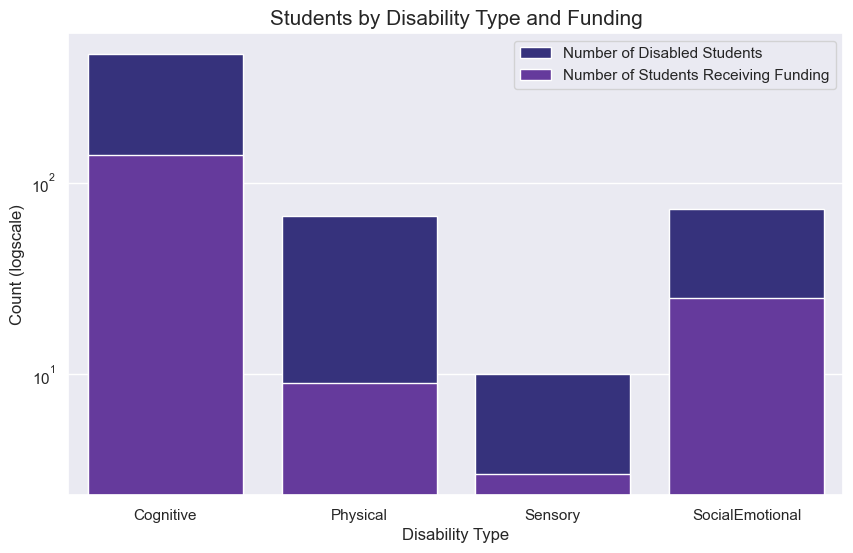

In [77]:
disability_counts = df.iloc[:, 20:24].sum()

disability_columns = [
    'Disability_Cognitive', 
    'Disability_Physical', 
    'Disability_Sensory', 
    'Disability_SocialEmotional'
]

disabled_students = df[df.iloc[:, 20:24].sum(axis=1) > 0]

funding_proportion = (
    disabled_students[disability_columns].multiply(
        disabled_students['NCCD-Funded'], axis=0
    )
).sum()

plt.figure(figsize=(10,6))
sns.barplot(
    x=[x[11:] for x in disability_counts.index], 
    y=disability_counts.values, 
    label="Number of Disabled Students"
)

sns.barplot(
    x=[x[11:] for x in funding_proportion.index], 
    y=funding_proportion.values, 
    label="Number of Students Receiving Funding"
)

plt.title(
    "Students by Disability Type and Funding",
    fontsize=15
)

plt.legend()
plt.yscale("log")
plt.ylabel("Count (logscale)")
plt.xlabel("Disability Type")
plt.show()

#Plotting the disability profile of the students

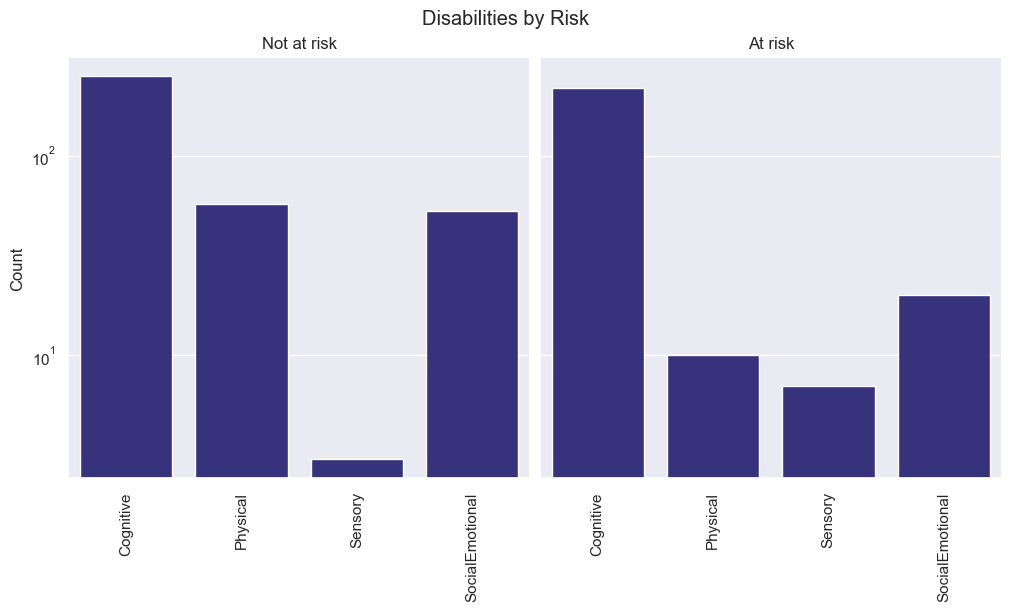

In [173]:
fig, ax = plt.subplots(1, 2, layout="constrained", figsize=(10, 6), sharey=True)
sns.barplot(
    x=[x[11:] for x in df.columns[20:24]],
    y=df.loc[df["At_Risk_Numeracy"]==False].iloc[:, 20:24].sum(), 
    ax=ax[0])
sns.barplot(
    x=[x[11:] for x in df.columns[20:24]],
    y=df.loc[df["At_Risk_Numeracy"]==True].iloc[:, 20:24].sum(), 
    ax=ax[1])
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Not at risk")
ax[1].set_title("At risk")
ax[0].set_ylabel("Count")
fig.suptitle("Disabilities by Risk")
plt.yscale("log")
plt.show()

C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2106671604.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels= ax[0].get_xticklabels(), rotation=90)
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2106671604.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels= ax[1].get_xticklabels(), rotation=90)


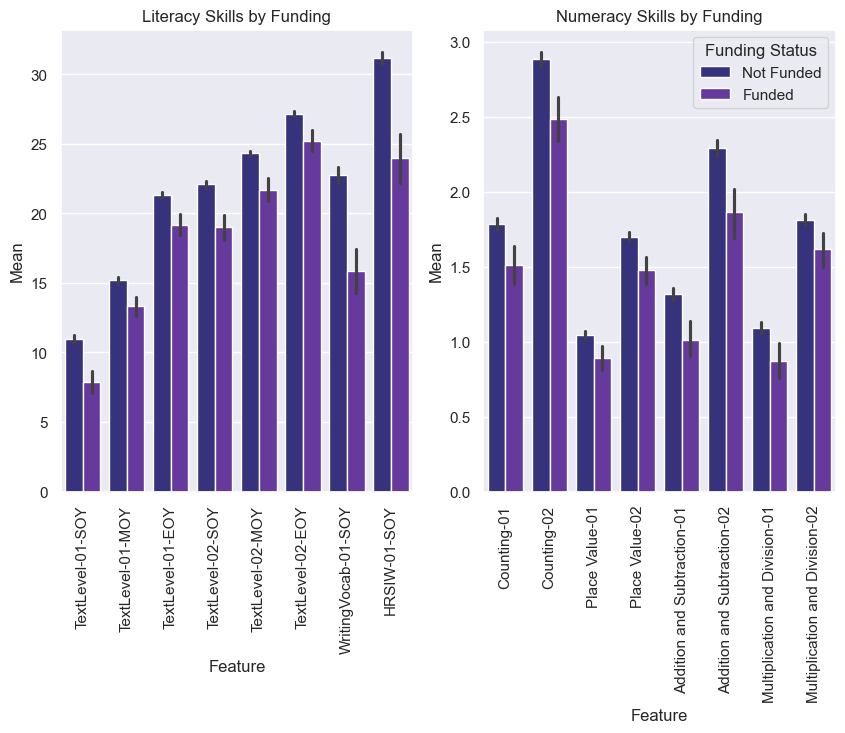

In [78]:
df_melted = df.loc[
    (df.iloc[:, 19:23] == 1).any(axis=1)
].melt(
    id_vars=["NCCD-Funded"], 
    value_vars=df.columns[1:9], 
    var_name="Feature", 
    value_name="Mean"
    )

df_melted_num = df.loc[
    (df.iloc[:, 19:23] == 1).any(axis=1)
].melt(
    id_vars=["NCCD-Funded"], 
    value_vars=df.columns[9:17], 
    var_name="Feature", 
    value_name="Mean"
    )

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="NCCD-Funded", data=df_melted, ax=ax[0])
sns.barplot(x="Feature", y="Mean", hue="NCCD-Funded", data=df_melted_num, ax=ax[1])

ax[0].set_xticklabels(labels= ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(labels= ax[1].get_xticklabels(), rotation=90)
ax[0].set_title("Literacy Skills by Funding")
ax[1].set_title("Numeracy Skills by Funding")
ax[0].legend_.remove()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Not Funded", "Funded"], title="Funding Status")
plt.show()

C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\187480144.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels= ax[0].get_xticklabels(), rotation=90)
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\187480144.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(labels= ax[1].get_xticklabels(), rotation=90)


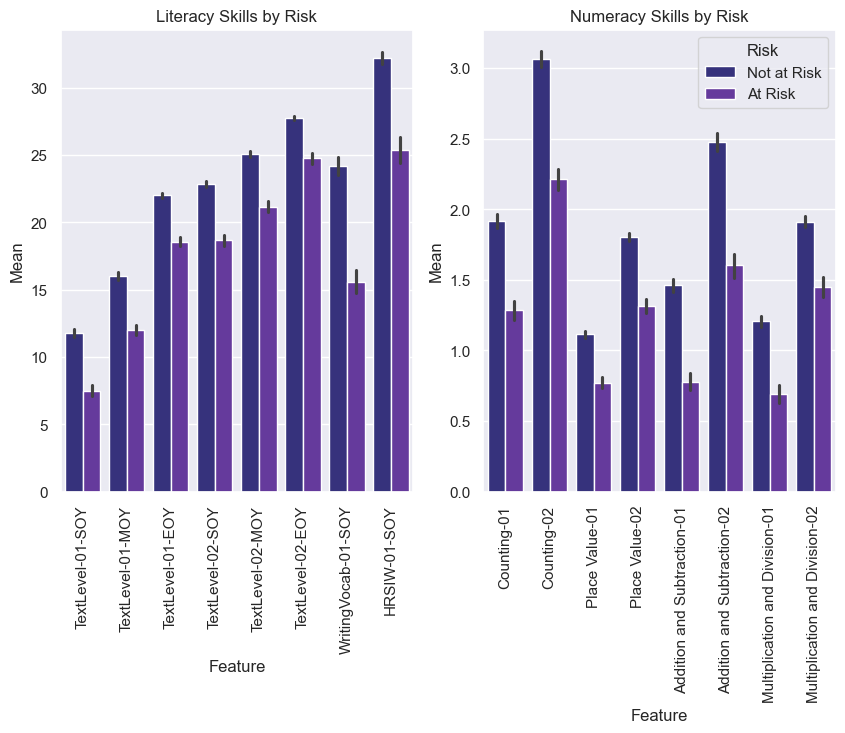

In [79]:
df_melted = df.melt(
    id_vars=["At_Risk_Numeracy"], 
    value_vars=df.columns[1:9], 
    var_name="Feature", 
    value_name="Mean"
    )

df_melted_num = df.melt(
    id_vars=["At_Risk_Numeracy"], 
    value_vars=df.columns[9:17], 
    var_name="Feature", 
    value_name="Mean"
    )

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x="Feature", y="Mean", hue="At_Risk_Numeracy", data=df_melted, ax=ax[0])
sns.barplot(x="Feature", y="Mean", hue="At_Risk_Numeracy", data=df_melted_num, ax=ax[1])

ax[0].set_xticklabels(labels= ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(labels= ax[1].get_xticklabels(), rotation=90)
ax[0].set_title("Literacy Skills by Risk")
ax[1].set_title("Numeracy Skills by Risk")
ax[0].legend_.remove()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Not at Risk", "At Risk"], title="Risk")
plt.show()

C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2128190922.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(labels= ax[0, 0].get_xticklabels(), rotation=90)
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2128190922.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(labels= ax[1, 0].get_xticklabels(), rotation=90)
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2128190922.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(labels= ax[0, 1].get_xticklabels(), rotation=90)
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_3744\2128190922.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

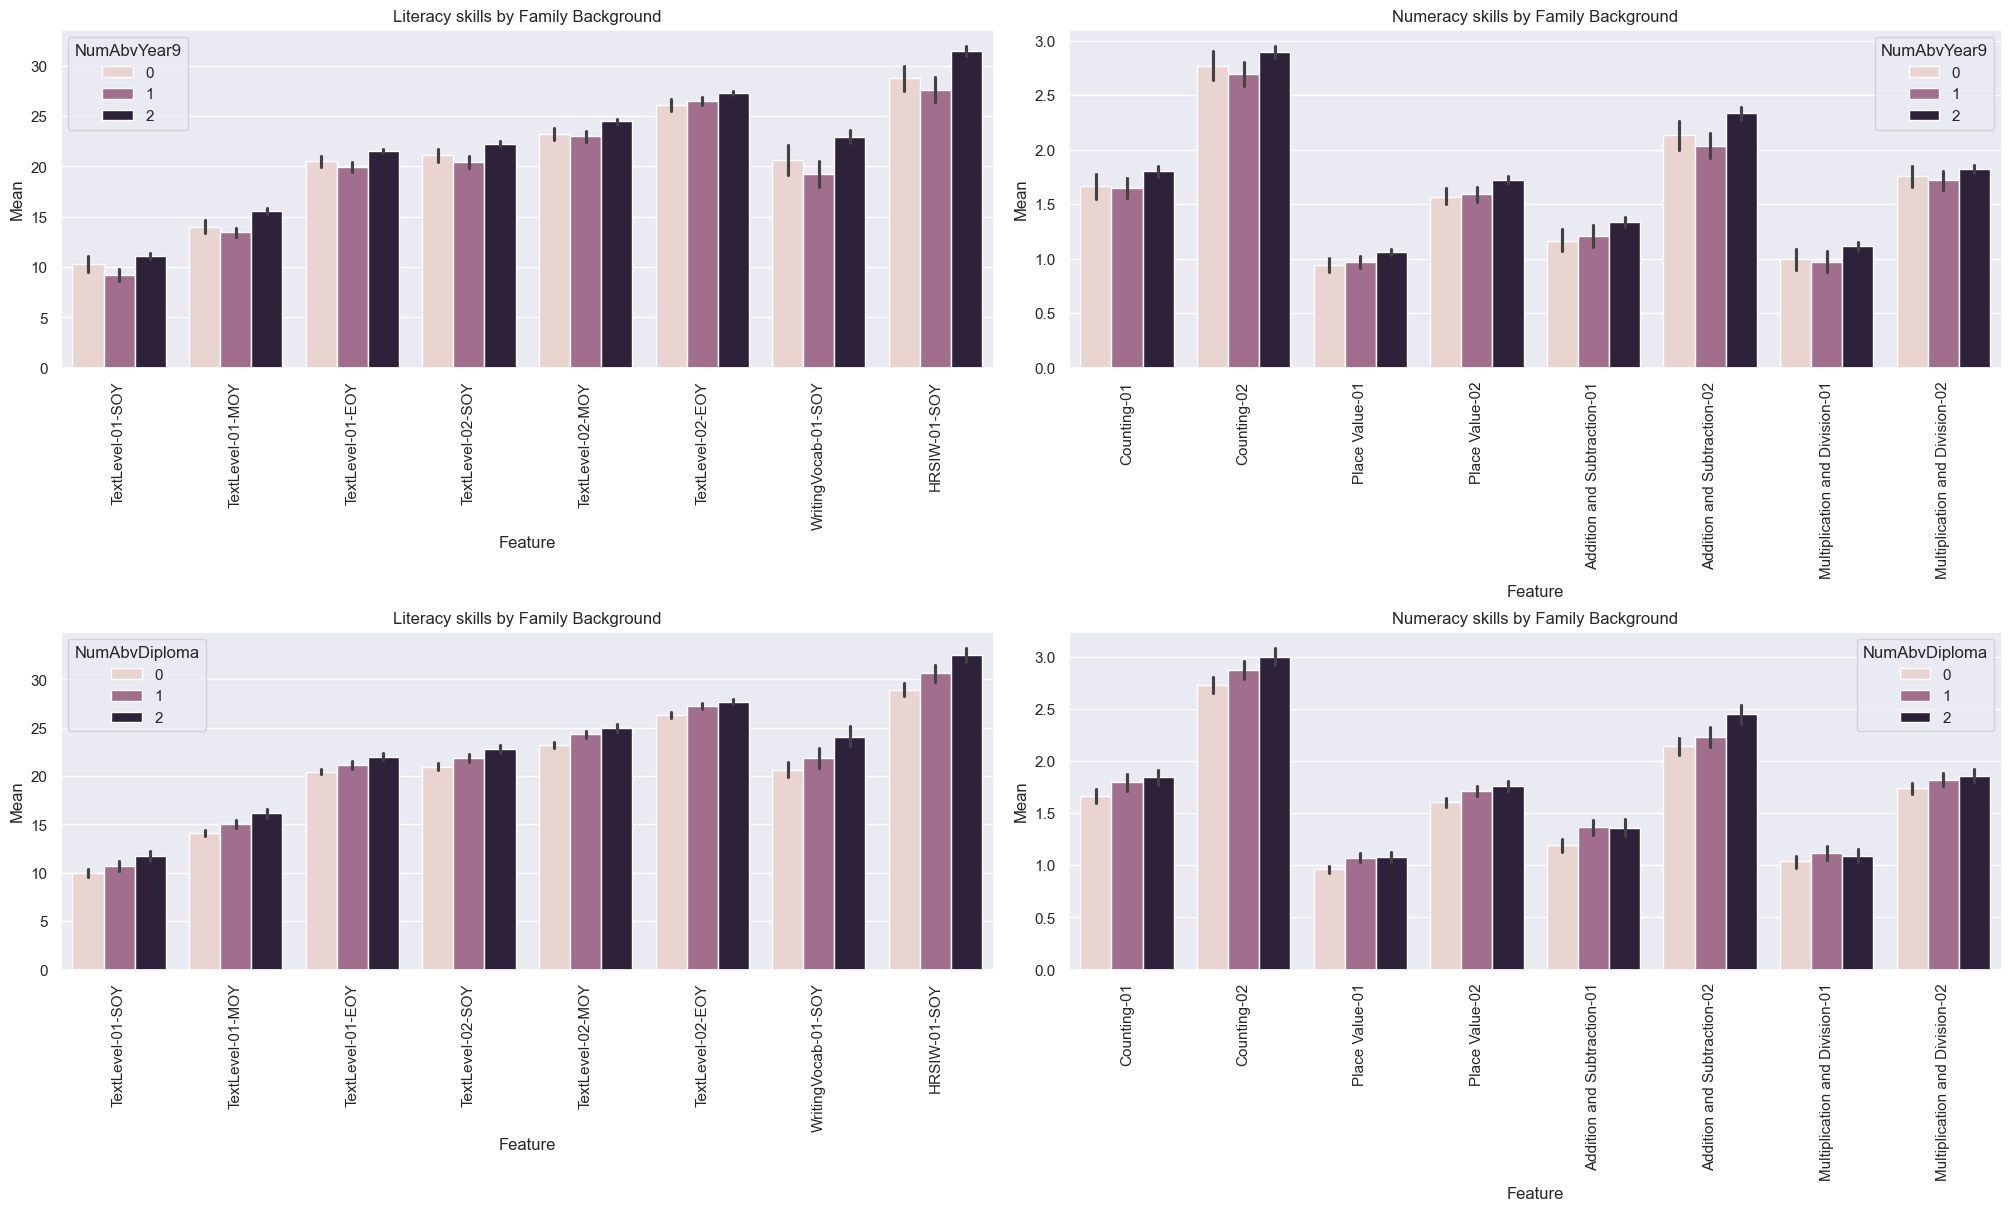

In [84]:
df_melted = df.melt(
    id_vars=["NumAbvYear9"], 
    value_vars=df.columns[1:9], 
    var_name="Feature", 
    value_name="Mean"
    )

df_melted_num = df.melt(
    id_vars=["NumAbvYear9"], 
    value_vars=df.columns[9:17], 
    var_name="Feature", 
    value_name="Mean"
    )
df_melted_1 = df.melt(
    id_vars=["NumAbvDiploma"], 
    value_vars=df.columns[1:9], 
    var_name="Feature", 
    value_name="Mean"
    )

df_melted_num_1 = df.melt(
    id_vars=["NumAbvDiploma"], 
    value_vars=df.columns[9:17], 
    var_name="Feature", 
    value_name="Mean"
    )

fig, ax = plt.subplots(2, 2, figsize=(20, 12), layout="constrained")
sns.barplot(x="Feature", y="Mean", hue="NumAbvYear9", data=df_melted, ax=ax[0, 0])
sns.barplot(x="Feature", y="Mean", hue="NumAbvYear9", data=df_melted_num, ax=ax[0, 1])
sns.barplot(x="Feature", y="Mean", hue="NumAbvDiploma", data=df_melted_1, ax=ax[1, 0])
sns.barplot(x="Feature", y="Mean", hue="NumAbvDiploma", data=df_melted_num_1, ax=ax[1, 1])

ax[0, 0].set_xticklabels(labels= ax[0, 0].get_xticklabels(), rotation=90)
ax[1, 0].set_xticklabels(labels= ax[1, 0].get_xticklabels(), rotation=90)
ax[0, 1].set_xticklabels(labels= ax[0, 1].get_xticklabels(), rotation=90)
ax[1, 1].set_xticklabels(labels= ax[1, 1].get_xticklabels(), rotation=90)
ax[0, 0].set_title("Literacy skills by Family Background")
ax[1, 0].set_title("Literacy skills by Family Background")
ax[0, 1].set_title("Numeracy skills by Family Background")
ax[1, 1].set_title("Numeracy skills by Family Background")

plt.show()

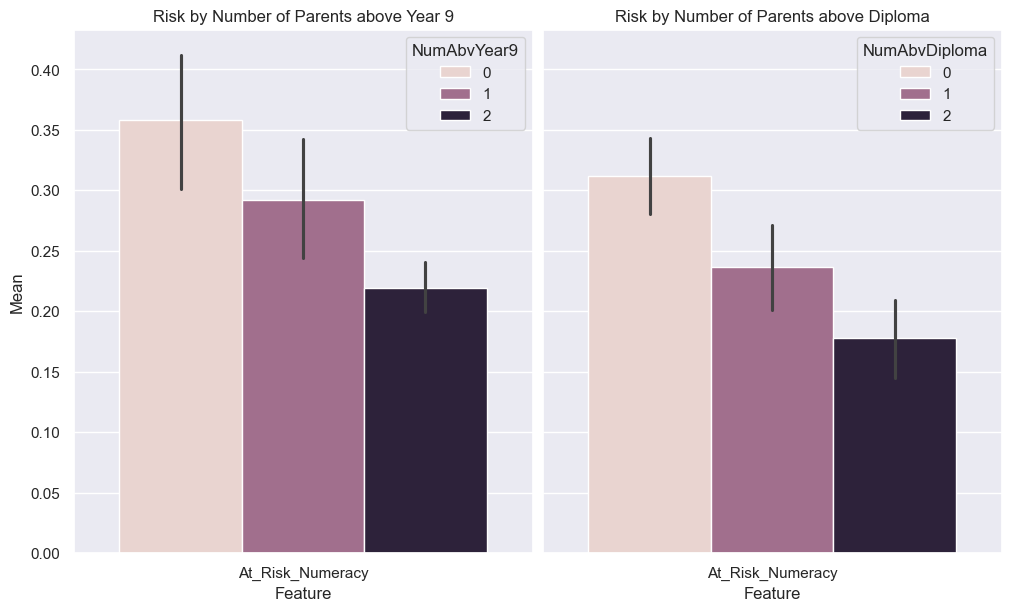

In [ ]:
df_melted = df.melt(
    id_vars=["NumAbvYear9"], 
    value_vars="At_Risk_Numeracy", 
    var_name="Feature", 
    value_name="Mean"
    )

df_melted_dip = df.melt(
    id_vars=["NumAbvDiploma"], 
    value_vars="At_Risk_Numeracy", 
    var_name="Feature", 
    value_name="Mean"
    )

fig, ax = plt.subplots(1, 2, figsize=(10, 6), layout="constrained", sharey=True)
sns.barplot(x="Feature", y="Mean", data=df_melted, hue="NumAbvYear9", ax=ax[0])
sns.barplot(x="Feature", y="Mean", data=df_melted_dip, hue="NumAbvDiploma", ax=ax[1])
ax[0].set_title("Risk by Number of Parents above Year 9")
ax[1].set_title("Risk by Number of Parents above Diploma")

plt.show()
print(plt.get_cmap())

In [86]:
print(df.iloc[:, 1:18].corrwith(df.iloc[:, -1]))
print(df.iloc[:, 19:-1].corrwith(df.iloc[:, -1]))

TextLevel-01-SOY                 -0.306091
TextLevel-01-MOY                 -0.318635
TextLevel-01-EOY                 -0.325088
TextLevel-02-SOY                 -0.345671
TextLevel-02-MOY                 -0.358265
TextLevel-02-EOY                 -0.345904
WritingVocab-01-SOY              -0.294146
HRSIW-01-SOY                     -0.297673
Counting-01                      -0.292441
Counting-02                      -0.342648
Place Value-01                   -0.279560
Place Value-02                   -0.329844
Addition and Subtraction-01      -0.317842
Addition and Subtraction-02      -0.326961
Multiplication and Division-01   -0.267106
Multiplication and Division-02   -0.258443
Kinder_Age                       -0.035229
dtype: float64
Disability_Non-disable       -0.252758
Disability_Cognitive          0.277191
Disability_Physical          -0.043374
Disability_Sensory            0.073655
Disability_SocialEmotional    0.010720
NCCD-Funded                   0.131719
NumSibling          

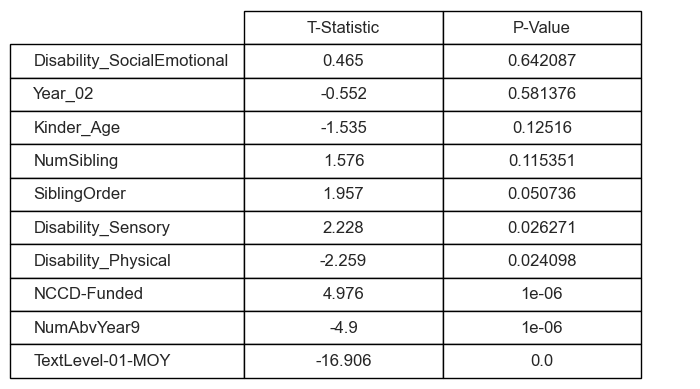

                            T-Statistic   P-Value
Disability_SocialEmotional        0.465  0.642087
Year_02                          -0.552  0.581376
Kinder_Age                       -1.535  0.125160
NumSibling                        1.576  0.115351
SiblingOrder                      1.957  0.050736
Disability_Sensory                2.228  0.026271
Disability_Physical              -2.259  0.024098
NCCD-Funded                       4.976  0.000001
NumAbvYear9                      -4.900  0.000001
TextLevel-01-MOY                -16.906  0.000000


In [88]:
binary_column = 'At_Risk_Numeracy'
numeric_columns = df.drop(["StudentID", "Gender", "At_Risk_Numeracy"], axis=1).columns


results = {}
for col in numeric_columns:
    true_values = df[df[binary_column] == True][col]
    false_values = df[df[binary_column] == False][col]

    t_stat, p_value = st.ttest_ind(true_values, false_values, equal_var=False, nan_policy='omit')

    results[col] = {'T-Statistic': round(t_stat, 3), 'P-Value': round(p_value, 6)}


results_df = pd.DataFrame(results).T.sort_values(
    by="P-Value", 
    ascending=False
    ).head(10)
fig, ax = plt.subplots()
ax.set_axis_off()
ax.table(results_df, loc="center", cellLoc="center", colWidths=[0.2, 0.2]).scale(2, 2)
plt.show()
print(results_df)

According to these T-Tests, all features apart from SocialEmotional disability, Number of Siblings, and Year of starting year 2 are significantly different among students at risk from students who are not at risk

According to the correlation table, Academic performance is the best indicator of whether a student is at risk of underperforming.

Disability_Physical          -0.043316
Disability_Sensory            0.073669
Disability_SocialEmotional    0.010775
Kinder_Age                   -0.034728
NumSibling                    0.036895
SiblingOrder                  0.043718
Year_02                      -0.011796

these are the columns having the lowest correlation with the target variable